# **Combinatoire : notions préalables**
### Romain GERARD

Importer les packages.

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import symbols, expand, latex

## Factorielle et coefficient binomial

In [3]:
def facto_rec(x):
    """
    Calcule la factorielle de x de manière récursive.
    """
    if x == 0:
        return 1
    return x * facto_rec(x-1)


def coeff_bino(n, k):
    """
    Calcule le coefficient binomial C(n, k).
    """
    return facto_rec(n) // (facto_rec(k)*facto_rec(n-k))


def coeff_bino_rec(n, k):
    """
    Calcule le coefficient binomial C(n, k) de manière récursive.
    """
    if k > n:
        return 0
    if k == 0 or k == n:
        return 1
    
    return coeff_bino_rec(n-1, k-1) + coeff_bino_rec(n-1, k)


def coeff_bino_dyn(n, k, memo={}):
    """
    Calcule le coefficient binomial C(n, k) de manière récursive et dynamique.
    """
    if k > n:
        return 0
    if k == 0 or k == n:
        return 1
    
    if (n, k) not in memo:
        memo[(n, k)] = coeff_bino_dyn(n-1, k-1) + coeff_bino_dyn(n-1, k)
    return memo[(n, k)]


# Exemple: 7!
x = 7
display(Math(rf"{x}! = {facto_rec(x)}"))

# Exemple: C(10, 5)
n, k = 10, 2
display(Math(rf"\binom{{{n}}}{{{k}}} = {coeff_bino_rec(n, k)}"))

# Exemple dynamique : C(100, 20)
display(Math(rf"\binom{{{100}}}{{{20}}} = {coeff_bino_dyn(100, 20)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Permutations

In [4]:
def permute_rec(lst):
    """
    Retourne la liste de toutes les permutations de lst, de manière récursive.
    """
    if len(lst) == 0:
        return [[]]

    result = []
    for i in range(len(lst)):
        current = lst[i]
        remaining = lst[:i] + lst[i+1:]
        for e in permute_rec(remaining):
            result.append([current] + e)
    return result

def combine_dyn(lst, memo=None):
    """
    Génère toutes les combinaisons possibles de toutes les tailles à partir d'une liste.
    """
    if memo is None:
        memo = {}

    # Si la liste est vide, il n'y a qu'une seule combinaison : l'ensemble vide.
    if len(lst) == 0:
        return [[]]

    # Si le résultat est déjà calculé, on le retourne depuis la mémoire.
    lst_tuple = tuple(lst)
    if lst_tuple in memo:
        return memo[lst_tuple]

    # Récurrence :
    # On exclut le premier élément et génère les combinaisons du reste.
    combinaisons_sans_premier = combine_dyn(lst[1:], memo)
    # On inclut le premier élément dans chaque combinaison du reste.
    premier = lst[0]
    combinaisons_avec_premier = [[premier] + combinaison for combinaison in combinaisons_sans_premier]
    # On combine les deux ensembles de combinaisons.
    result = combinaisons_sans_premier + combinaisons_avec_premier

    memo[lst_tuple] = result

    return result


# Exemple
n = 7
A = list(range(1, n+1))
sigma_n = permute_rec(A)

print("A =", A)
print()
print("Ensemble de toutes les n-permutations de A :")
print(sigma_n[0])
print(sigma_n[1])
print(sigma_n[2])
print(sigma_n[3])
print(". . .")
print(sigma_n[-2])
print(sigma_n[-1])

display(Math(rf"|\sigma_n| = {len(sigma_n)}"))
display(Math(rf"|A|! = {facto_rec(len(A))}"))


A = [1, 2, 3, 4, 5, 6, 7]

Ensemble de toutes les n-permutations de A :
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 7, 6]
[1, 2, 3, 4, 6, 5, 7]
[1, 2, 3, 4, 6, 7, 5]
. . .
[7, 6, 5, 4, 3, 1, 2]
[7, 6, 5, 4, 3, 2, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Nombre de Stirling de seconde espèce

In [5]:
def calcule_stirling_rec(n, k):
    """
    Calcule le nombre de Stirling de seconde espèce S(n, k)
    selon une définition récursive.
    
    S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    avec les cas de base :
       - S(0, 0) = 1
       - S(n, 0) = 0 pour n > 0
       - S(0, k) = 0 pour k > 0
    """
    if n == 0 and k == 0:
        return 1
    if (n == 0 and k > 0) or (n > 0 and k == 0):
        return 0

    return calcule_stirling_rec(n-1, k-1) + k*calcule_stirling_rec(n-1, k)


def calcule_stirling_dyn(n, k, memo={}):
    """
    Calcule le nombre de Stirling de seconde espèce (version dynamique).
    """
    if n == 0 and k == 0:
        return 1
    if (n == 0 and k > 0) or (n > 0 and k == 0):
        return 0

    if (n, k) not in memo:
        memo[(n, k)] = calcule_stirling_dyn(n-1, k-1) + k*calcule_stirling_dyn(n-1, k)
    return memo[(n, k)]


display(Math(r"""
\textbf{Nombres de Stirling de seconde espèce} :
\\
\text{Définition récursive : }
S(n, k) = S(n-1, k-1) + k \, S(n-1, k),
\quad S(0, 0) = 1,
\quad S(x, 0) = S(0, y) = 0 \quad \text{pour tout } x>0, y>0.
"""))

# Exemple
n = 4
for k in range(5):
    display(Math(rf"S({n},{k}) = {calcule_stirling_rec(n,k)}"))

# Exemple dynamique
display(Math(rf"S({10},{5}) = {calcule_stirling_dyn(10, 5)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Table des nombres de Stirling de seconde espèce (n/k).
L = 10
table_stirling = np.zeros((L, L))
n, k = table_stirling.shape
table_stirling[0, 0] = 1
for i in range(1, n):
    for j in range(1, n):
        table_stirling[i, j] = table_stirling[i-1, j-1] + j*table_stirling[i-1, j]
print("Nombres de Stirling de seconde espèce (n/k):\n", table_stirling, sep="")

Nombres de Stirling de seconde espèce (n/k):
[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    3.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    7.    6.    1.    0.    0.    0.    0.    0.]
 [   0.    1.   15.   25.   10.    1.    0.    0.    0.    0.]
 [   0.    1.   31.   90.   65.   15.    1.    0.    0.    0.]
 [   0.    1.   63.  301.  350.  140.   21.    1.    0.    0.]
 [   0.    1.  127.  966. 1701. 1050.  266.   28.    1.    0.]
 [   0.    1.  255. 3025. 7770. 6951. 2646.  462.   36.    1.]]


## Nombre de Bell

In [7]:
def calcule_bell_iter(n):
    res = 0
    for k in range(1, n+1):
        res += calcule_stirling_rec(n, k)
    return res


def calcule_bell_rec(n):
    if n == 0:
        return 1
    
    res = 0
    for m in range(n):
        res += coeff_bino_rec(n-1, m) * calcule_bell_rec(m)
    return res


def calcule_bell_dyn(n, memo={}):
    # Version dynamique.
    if n == 0:
        return 1
    
    if n in memo:
        return memo[n]
    
    res = 0
    for m in range(n):
        res += coeff_bino_dyn(n-1, m) * calcule_bell_dyn(m)

    memo[n] = res
    return res


display(Math(r"""
\textbf{Nombres de Bell} : B(n) = \sum_{k=1}^{n} S(n,k).
\\
\text{Définition récursive : }
B(n) = \sum_{m=0}^{n-1} \binom{n-1}{m} \, B(m), \quad B(0) = 1.
"""))

# Exemple : A000110
for num in range(0, 11):
    display(Math(rf"B({num}) = {calcule_bell_dyn(num)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Partitions de type A

In [8]:
def partitionne_stirling_rec(lst, k):
    """
    Retourne la liste de toutes les partitions de lst en k sous-listes (blocs) en
    s"inspirant de la définition récursive du nombre de Stirling de seconde espèce:
    
                        S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    """
    n = len(lst)

    # -------------
    # Cas de base :
    # -------------

    # Si k = 0 et n = 0, alors on a une seule partition vide.
    if k == 0 and n == 0:
        return [[]]
    
    # Si k = 0 ou n = 0, mais pas les deux en même temps,
    # alors il n"existe aucune partition.
    if (k == 0 or n == 0) and (k != n):
        return []
    
    # Si k = n, chaque élément de lst doit être dans son propre bloc.
    if k == n:
        return [ [[x] for x in lst] ]
    
    # Si k = 1, il n"y a qu"un seul bloc contenant tous les éléments.
    if k == 1:
        return [[lst]]
    
    # Si k > n, il n"existe pas de partition car on ne peut
    # pas répartir n éléments en plus de n blocs non vides.
    if k > n:
        return []
    
    # ----------------------------------------------------
    # Récurrence :
    # 1) On met lst[0] dans son propre bloc, et on partitionne
    #    lst[1:] en (k-1) blocs.
    # 2) On met lst[0] dans chacun des blocs d"une partition de
    #    lst[1:] en k blocs.
    # ----------------------------------------------------

    # Initialiser la liste de toutes les partitions.
    lst_part = []
    
    # 1) Ajouter lst[0] dans un nouveau bloc (S(n-1, k-1))
    for part in partitionne_stirling_rec(lst[1:], k - 1):
        # On ajoute le bloc [lst[0]] devant
        new_part = [[lst[0]]] + part
        lst_part.append(new_part)
    
    # 2) Ajouter lst[0] dans chacun des blocs.
    for part in partitionne_stirling_rec(lst[1:], k):
        # Pour chaque partition obtenue, on crée k nouvelles partitions
        # où lst[0] est inséré dans un seul bloc par partition.
        for i in range(len(part)):
            new_part = []
            for j, bloc in enumerate(part):
                if j == i:
                    # On ajoute lst[0] dans le bloc d"indice i ...
                    new_part.append([lst[0]] + bloc)
                else:
                    # ... sinon on recopie le bloc.
                    new_part.append(bloc[:])
            lst_part.append(new_part)
    
    return lst_part


def partitionne_stirling_dyn(lst, k, memo=None):
    """
    Version dynamique de partitionne_stirling_rec qui utilise la mémorisation.
    """
    if memo is None:
        memo = {}
    
    n = len(lst)
    
    # Créer une clé unique
    key = (tuple(lst), k)
    
    # Si le résultat est déjà dans la mémoire, le retourner.
    if key in memo:
        return memo[key]

    # -------------
    # Cas de base :
    # -------------
    if k == 0 and n == 0:
        return [[]]
    
    if (k == 0 or n == 0) and (k != n):
        return []
    
    if k == n:
        return [ [[x] for x in lst] ]
    
    if k == 1:
        return [[lst]]
    
    if k > n:
        return []

    # Initialiser la liste des partitions
    lst_part = []
    
    # 1) Ajouter lst[0] dans un nouveau bloc
    for part in partitionne_stirling_dyn(lst[:-1], k - 1, memo):
        new_part = part + [[lst[-1]]]
        lst_part.append(new_part)
    
    # 2) Ajouter lst[0] dans chacun des blocs existants
    for part in partitionne_stirling_dyn(lst[:-1], k, memo):
        for i in range(len(part)):
            new_part = []
            for j, bloc in enumerate(part):
                if j == i:
                    new_part.append(bloc + [lst[-1]])
                else:
                    new_part.append(bloc[:])
            lst_part.append(new_part)
    
    # Mémoriser le résultat.
    memo[key] = lst_part
    
    return lst_part


# Exemple
A = list(range(1, 11))
k = 5
partitions = partitionne_stirling_dyn(A, k)
for p in partitions[:4]:
    print(p)
print("...")
for p in partitions[-4:]:
    print(p)

display(Math(rf"S({len(A)},{k}) = {len(partitions)}"))


[[1, 2, 3, 4, 5, 6], [7], [8], [9], [10]]
[[1, 2, 3, 4, 5, 7], [6], [8], [9], [10]]
[[1, 2, 3, 4, 5], [6, 7], [8], [9], [10]]
[[1, 2, 3, 4, 6, 7], [5], [8], [9], [10]]
...
[[1], [2, 10], [3], [4], [5, 6, 7, 8, 9]]
[[1], [2], [3, 10], [4], [5, 6, 7, 8, 9]]
[[1], [2], [3], [4, 10], [5, 6, 7, 8, 9]]
[[1], [2], [3], [4], [5, 6, 7, 8, 9, 10]]


<IPython.core.display.Math object>

In [9]:
def partitionne_bell(lst):
    """
    Retourne la liste de toutes les partitions des éléments de lst en s"inspirant
    de la définition du nombre de Bell comme une somme de nombres de Stirling de
    seconde espèce.
    """
    n = len(lst)
    all_part = []
    for k in range(n+1):
        all_part = all_part + partitionne_stirling_dyn(lst, k)
    return all_part


# Exemple
A = list(range(0, 6))
all_partitions = partitionne_bell(A)
for p in all_partitions[:4]:
    print(p)
print("...")
for p in all_partitions[-4:]:
    print(p)
display(Math(rf"B({len(A)}) = {len(all_partitions)}"))
        

[[0, 1, 2, 3, 4, 5]]
[[0, 1, 2, 3, 4], [5]]
[[0, 1, 2, 3, 5], [4]]
[[0, 1, 2, 3], [4, 5]]
...
[[0], [1], [2, 5], [3], [4]]
[[0], [1], [2], [3, 5], [4]]
[[0], [1], [2], [3], [4, 5]]
[[0], [1], [2], [3], [4], [5]]


<IPython.core.display.Math object>

## Statistiques sur les permutations de type A

Descente, ascension, excédence et inversion.

In [10]:
def liste_desc(perm):
    """
    Retourne les indices i tels que σ(i) > σ(i+1).
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] > perm[i+1]]
    return lst


def liste_asc(perm):
    """
    Retourne les indices i tels que σ(i) < σ(i+1).
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] < perm[i+1]]
    return lst


def liste_exce(perm):
    """
    Retourne les indices i tels que σ(i) > i.
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] > i]
    return lst


def liste_inv(perm):
    """
    Retourne les paires (i, j) avec i < j et σ(i) > σ(j).
    """
    n = len(perm)
    lst = [(i, j) for i in range(n) for j in range(i+1, n) if perm[i] > perm[j]]
    return lst


# Exemple
n = 10
n_perm = [0, 1, 2, 3, 4, 5, 8, 7, 9, 6]

print(f"Permutation:\n{n_perm}")
print(f"Descentes :\n{liste_desc(n_perm)}")
print(f"Ascensions :\n{liste_asc(n_perm)}")
print(f"Excédence :\n{liste_exce(n_perm)}")
print(f"Inversions :\n{liste_inv(n_perm)}")



Permutation:
[0, 1, 2, 3, 4, 5, 8, 7, 9, 6]
Descentes :
[6, 8]
Ascensions :
[0, 1, 2, 3, 4, 5, 7]
Excédence :
[6, 8]
Inversions :
[(6, 7), (6, 9), (7, 9), (8, 9)]


Visualisation des distributions des statistiques.

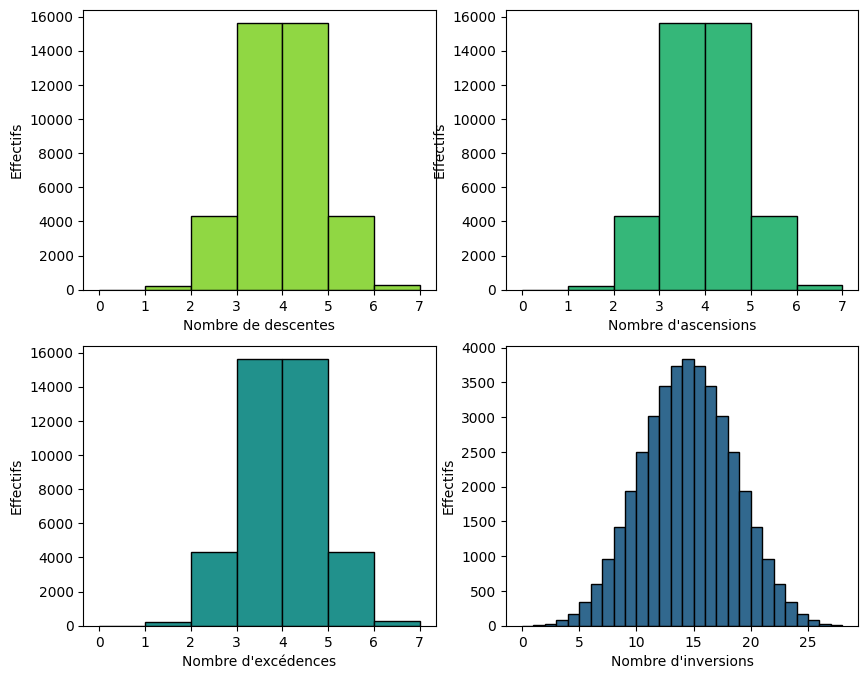

Analyse sur 40320 permutations de taille 8.


In [11]:
# Paramètres
n = 8
A = list(range(n))

# Générer les permutations
permutations = permute_rec(A)

# Calculer les statistiques
desc_counts = []
asc_counts  = []
exce_counts = []
inv_counts  = []

for perm in permutations:
    desc_counts.append(len(liste_desc(perm)))
    asc_counts.append(len(liste_asc(perm)))
    exce_counts.append(len(liste_exce(perm)))
    inv_counts.append(len(liste_inv(perm)))

# ------------
# Visualiser
# ------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Nombre de descentes
axes[0,0].hist(desc_counts, bins="auto", color="#90d743", edgecolor="black")
axes[0,0].set_xlabel("Nombre de descentes")
axes[0,0].set_ylabel("Effectifs")

# Nombre d"ascensions
axes[0,1].hist(asc_counts, bins="auto", color="#35b779", edgecolor="black")
axes[0,1].set_xlabel("Nombre d'ascensions")
axes[0,1].set_ylabel("Effectifs")

# Nombre d"excédences
axes[1,0].hist(exce_counts, bins="auto", color="#21918c", edgecolor="black")
axes[1,0].set_xlabel("Nombre d'excédences")
axes[1,0].set_ylabel("Effectifs")

# Nombre d"inversions
axes[1,1].hist(inv_counts, bins="auto", color="#31688e", edgecolor="black")
axes[1,1].set_xlabel("Nombre d'inversions")
axes[1,1].set_ylabel("Effectifs")

plt.show()

print(f"Analyse sur {len(permutations)} permutations de taille {n}.")

## Partitions de type B

### Générer des partitions de type B.

In [12]:
# Une partition de type B est une partition d'un ensemble ⟨n⟩ qui respecte les propriétés suivantes :
# 1. Pour tout i ≥ 1, les blocs π2i et π2i−1 sont opposés, c'est-à-dire que π2i = −π2i−1,
#    où −β représente l'ensemble des opposés des éléments de β (−β = {−a : a ∈ β}).
# 2. Il existe un bloc spécial appelé le bloc zéro (π0), qui est symétrique, c'est-à-dire que si a ∈ π0,
#    alors −a ∈ π0 également.
#
# Représentation d'Adler :
# - Dans le bloc zéro, tous les éléments négatifs sont supprimés.
# - Dans chaque bloc, les éléments sont triés par valeur absolue croissante.
# - Pour chaque paire de blocs opposés, seul le bloc avec le premier élément positif est conservé.

# Stratégie pour générer une partition de type B d'un ensemble de taille et divisée en k blocs :
# 1.1. Récupérer une partition de type A d'un ensemble de taille n divisée en k blocs (liste de k sous-listes).
# 1.2. Trier tous les éléments de chaque sous-liste par valeur croissante.
# 1.3. Trier les sous-listes par valeur croissante de leur premier élément.
# 1.4. Récupérer la liste des indices des éléments qui ne sont pas les premiers de leur bloc et pas dans le bloc zéro.
# 2. Générer toutes les combinaisons des indices de la liste obtenue à l'étape 1.4. de longueur 0 à la longueur de la liste.
# 3. Pour chaque combinaison d'indices, créer une nouvelle partition de type B en inversant le signe aux indices de la combinaison.


def print_partitions(parts, length=-1, name="partitions", scope=5):
    """
    Affiche les partitions de manière lisible.
    """
    if len(parts) > 2 * scope:
        for i in range(scope):
            print(parts[i])
        print("...")
        for i in range(-scope, 0):
            print(parts[i])
    else:
        for i in range(len(parts)):
            print(parts[i])
    print(f"Nombre de {name} pour n={length} : {len(parts)}")


def sort_partitions(partitions):
    """
    Trie les partitions de type B (ou A) selon la représentation d'Adler.
    """
    sorted_partitions = []
    for part in partitions:
        # Trier les blocs par valeur croissante de leur premier élément
        part.sort(key=lambda x: x[0])
        # Trier les éléments de chaque bloc par valeur absolue croissante
        for bloc in part:
            bloc.sort(key=lambda x: abs(x))
        sorted_partitions.append(part)
    return sorted_partitions


def get_signable_inds(part):
    """
    Récupère la liste des indices des éléments qui ne sont pas les premiers de leur bloc et pas dans le bloc zéro.
    """
    liste_signable_inds = []
    ind = 0
    for i in range(len(part)):
        for j in range(0, len(part[i])):
            if part[i][0] != 0 and part[i][j] != part[i][0]:
                liste_signable_inds.append(ind)
            ind += 1
    return liste_signable_inds


def convert_part_A_to_B(part_A, permu_signed_inds):
    """
    Convertit une partition de type A en une partition de type B en inversant le signe
    aux indices spécifiés par permu_signed_inds.
    """
    ind = 0
    part_B = []
    for i in range(len(part_A)):
        bloc = []
        for j in range(0, len(part_A[i])):
            if ind in permu_signed_inds:
                bloc.append(-part_A[i][j])
            else:
                bloc.append(part_A[i][j])
            ind += 1
        part_B.append(bloc)
    return part_B


def get_all_parts_B_from_A(parts_A):
    """
    Récupère toutes les partitions de type B à partir d'une liste de partitions de type A.
    """
    all_part_B = []
    for part_A in parts_A:
        # Trier la partition de type A selon la représentation d'Adler
        #part_A = sort_partitions([part_A])[0]
        # Récupérer la liste des indices signables
        liste_signable_inds = get_signable_inds(part_A)
        # Générer toutes les combinaisons d'indices signables
        combinaisons = combine_dyn(liste_signable_inds)
        for comb in combinaisons:
            # Convertir la partition de type A en type B
            part_B = convert_part_A_to_B(part_A, comb)
            all_part_B.append(part_B)
    return all_part_B


# Paramètres
n = 6
E = list(range(1, n+1))

# Générer toutes les partitions de type A.
parts_A = partitionne_bell(E)

# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)

# Afficher les résultats
print_partitions(parts_B, length=n, name="partitions de type B", scope=3)
print_partitions(parts_A, length=n, name="partitions de type A", scope=3)


[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5, -6]]
[[1, 2, 3, 4, -5, 6]]
...
[[1], [2], [3], [4], [5, 6]]
[[1], [2], [3], [4], [5, -6]]
[[1], [2], [3], [4], [5], [6]]
Nombre de partitions de type B pour n=6 : 1539
[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5], [6]]
[[1, 2, 3, 4, 6], [5]]
...
[[1], [2], [3], [4, 6], [5]]
[[1], [2], [3], [4], [5, 6]]
[[1], [2], [3], [4], [5], [6]]
Nombre de partitions de type A pour n=6 : 203


Nombre de Dowling :

$$
D_n \;=\; \sum_{i=0}^n \binom{n}{i}
         \sum_{k=0}^{\,n-i} 2^{\,n-i-k}\,S(n-i,k).
$$

Le nombre de Dowling est une généralisation des nombres de Bell, qui compte les partitions de type B. Les nombres de Dowling sont définis pour n ≥ 0 et k ≥ 0. Ils sont calculés à l'aide de la formule ci-dessus.

In [13]:
def calcule_dowling(n):
    """
    Fonction pour calculer le nombre de partitions de type B selon la formule du nombre de Dowling
    """
    dn = 0
    for i in range(n+1):
        # coeff binomial C(n, i)
        c = coeff_bino_dyn(n, i)
        # somme sur k
        s = 0
        for k in range(n - i + 1):
            s += (2**(n - i - k)) * calcule_stirling_dyn(n - i, k)
        dn += c * s
    return dn

# Exemple : A007405
for i in range(0, 10):
    display(Math(rf"D({i}) = {calcule_dowling(i)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let $w_n$ denote the number of type B set partitions without zero block over $<n>$.
$$
w_n \;=\; \sum_{k=0}^n 2^{\,n-k}\,S(n,k).
$$

In [14]:
def calcule_dowling_no_zero_block(n):
    """
    Fonction pour calculer le nombre de partitions de type B sans bloc zéro selon la formule du nombre de Dowling
    """
    wn = 0
    for k in range(0, n+1):
        wn += (2**(n - k)) * calcule_stirling_dyn(n, k)
    return wn


# Exemple : A004211
for i in range(0, 10):
    display(Math(rf"w_{i} = {calcule_dowling_no_zero_block(i)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Type B separated set partitions

In [15]:
def is_separated(part):
    """
    Vérifie si une partition de type B est séparée.
    """
    # Vérifier les blocs
    for bloc in part:
        # Vérifier si les éléments sont consécutifs
        for i in range(len(bloc) - 1):
            if abs(bloc[i]) + 1 == abs(bloc[i + 1]) and bloc[i] * bloc[i + 1] > 0:
                return False
    return True

def is_strongly_separated(part):
    """
    Vérifie si une partition de type B est fortement séparée.
    """
    # Vérifier les blocs
    for bloc in part:
        # Vérifier si les éléments sont consécutifs
        for i in range(len(bloc) - 1):
            if abs(bloc[i]) + 1 == abs(bloc[i + 1]):
                return False
    return True


# Paramètres
n = 5

# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)

# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)

# Filtrer les partitions de type B pour ne garder que celles qui sont séparées.
parts_B_separated_no_b0 = [part for part in parts_B if is_separated(part)]

# Filtrer les partitions de type B pour ne garder que celles qui sont fortement séparées.
parts_B_strong_separated_no_b0 = [part for part in parts_B if is_strongly_separated(part)]

# Afficher les résultats
print_partitions(parts_B_separated_no_b0, length=n, name="partitions de type B séparées sans b0", scope=3)
print(f"Nombre de partitions de type B fortement séparées sans b0 pour n={n} : {len(parts_B_strong_separated_no_b0)}")

n = n-1
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
parts_B = get_all_parts_B_from_A(parts_A)
print(f"Nombre de partitions de type B sans b0 pour n={n} : {len(parts_B)}")



[[1, -2, 3, -4, 5]]
[[1, -2, 3, -4], [5]]
[[1, -2, 3, 5], [4]]
...
[[1], [2], [3, -5], [4]]
[[1], [2], [3], [4, -5]]
[[1], [2], [3], [4], [5]]
Nombre de partitions de type B séparées sans b0 pour n=5 : 116
Nombre de partitions de type B fortement séparées sans b0 pour n=5 : 49
Nombre de partitions de type B sans b0 pour n=4 : 49


### Type B Merging-Free set partitions

Merge-free block.

In [16]:
def is_merge_free(part):
    """
    Vérifie si une partition de type B est merge-free.
    """
    for i in range(1, len(part)):
        # Vérifier si le maximum du bloc i-1 est inférieur au minimum du bloc i en valeur absolue
        if abs(part[i-1][-1]) < abs(part[i][0]):
            return False
    return True


# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1 ,n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Filtrer les partitions de type B pour ne garder que celles qui sont merge-free.
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
# Afficher les résultats
print_partitions(parts_B_merge_free, length=n, name="partitions de type B merge-free", scope=3)
print(f"Nombre de partitions de type B pour n={n} : {len(parts_B)}")

n = n-1
E = list(range(n+1))
parts_A = partitionne_bell(E)
parts_B = get_all_parts_B_from_A(parts_A)
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
print(f"Nombre de partitions de type B merge-free n={n} : {len(parts_B_merge_free)}")
print(f"Nombre de partitions de type B pour n={n} : {len(parts_B)}")


[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, -5]]
[[1, 2, 3, -4, 5]]
...
[[1, 5], [2, -4], [3]]
[[1, -5], [2, 4], [3]]
[[1, -5], [2, -4], [3]]
Nombre de partitions de type B merge-free pour n=5 : 116
Nombre de partitions de type B pour n=5 : 257
Nombre de partitions de type B merge-free n=4 : 32
Nombre de partitions de type B pour n=4 : 116


Normal merge-free block.

In [17]:
def is_normal_merge_free(part):
    """
    Vérifie si une partition de type B est merge-free.
    """
    for i in range(1, len(part)):
        # Vérifier si le maximum du bloc i-1 est inférieur au minimum du bloc i.
        if max(part[i-1]) < min(part[i]):
            return False
    return True


# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Filtrer les partitions de type B pour ne garder que celles qui sont normal merge-free.
parts_B_normal_merge_free = [part for part in parts_B if is_normal_merge_free(part)]
# Afficher les résultats
print_partitions(parts_B_normal_merge_free, length=n, name="partitions de type B normal merge-free", scope=3)


[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, -5]]
[[1, 2, 3, -4, 5]]
...
[[1], [2, -4], [3, -5]]
[[1, 5], [2], [3, -4]]
[[1], [2, -5], [3, -4]]
Nombre de partitions de type B normal merge-free pour n=5 : 116


In [18]:
# "The number of type B merging-free separated partition over n and
# and the number of type B set partitions without zero block over n-1
# are equal."

results = []
for n in range(8):

    E = list(range(n + 1))
    parts_A = partitionne_bell(E)
    parts_B = get_all_parts_B_from_A(parts_A)

    D = list(range(1, n + 1))
    parts_A = partitionne_bell(D)
    parts_B_no_0 = get_all_parts_B_from_A(parts_A)

    results.append({
        'n'                              : n,
        "type B"                         : len(parts_B),
        'no_b0'                          : len(parts_B_no_0),
        'merge_free'                     : sum(is_merge_free(p) for p in parts_B),
        'separated'                      : sum(is_separated(p) for p in parts_B),
        'merge_free_no_b0'               : sum(is_merge_free(p) for p in parts_B_no_0),
        'separated_no_b0'                : sum(is_separated(p) for p in parts_B_no_0),
        'merge_free_separated'           : sum(is_merge_free(p) and is_separated(p) for p in parts_B),
        'merge_free_separated_no_b0'     : sum(is_merge_free(p) and is_separated(p) for p in parts_B_no_0),
        'strongly_separated'             : sum(is_strongly_separated(p) for p in parts_B),
        'strongly_separated_no_b0'       : sum(is_strongly_separated(p) for p in parts_B_no_0),
    })

df = pd.DataFrame(results).set_index('n')
df

,type B,no_b0,merge_free,separated,merge_free_no_b0,separated_no_b0,merge_free_separated,merge_free_separated_no_b0,strongly_separated,strongly_separated_no_b0
n,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,1,1,1,1,1
2,6,3,2,4,2,2,1,1,2,1
3,24,11,7,14,6,6,4,3,7,3
4,116,49,32,60,24,24,16,11,27,11
5,648,257,173,306,116,116,80,49,132,49
6,4088,1539,1064,1796,648,648,458,257,733,257
7,28640,10299,7275,11838,4088,4088,2940,1539,4615,1539


### Statistiques sur les partitions de type B

Une inversion est un couple $(s, S_j)$, avec $s$ un entier et $S_j$ un bloc, tels que :
- $s \in S_i$ avec $i<j$
- $s > m_j$ avec $m_j$ le minimum du bloc $S$

In [19]:
# Paramètres
n = 6
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Filtrer les partitions de type B pour ne garder que celles qui sont séparées.
parts_B_separated = [part for part in parts_B if is_separated(part)]
# Filtrer les partitions de type B pour ne garder que celles qui sont merge-free.
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
# Filtrer les partitions de type B pour ne garder que celles qui sont normal merge-free.
parts_B_normal_merge_free = [part for part in parts_B if is_normal_merge_free(part)]


In [20]:
def compte_inversions(part):
    """
    Compte le nombre d'inversions dans une partition.
    """
    n = len(part)
    count = 0
    for i in range(n-1):
        for j in range(len(part[i])):
            if part[i][j] > part[i+1][0]:  # équivalent à part[i][j] > abs(np.array(part[i+1])).min()
                count += 1
    return count

# Compter les inversions dans chaque partition de type B
parts_B_inv_counts = [compte_inversions(part) for part in parts_B]
# Compter les inversions dans chaque partition de type B séparée
parts_B_separated_inv_counts = [compte_inversions(part) for part in parts_B_separated]
# Compter les inversions dans chaque partition de type B merge-free
parts_B_merge_free_inv_counts = [compte_inversions(part) for part in parts_B_merge_free]
# Compter les inversions dans chaque partition de type B normal merge-free
parts_B_normal_merge_free_inv_counts = [compte_inversions(part) for part in parts_B_normal_merge_free]


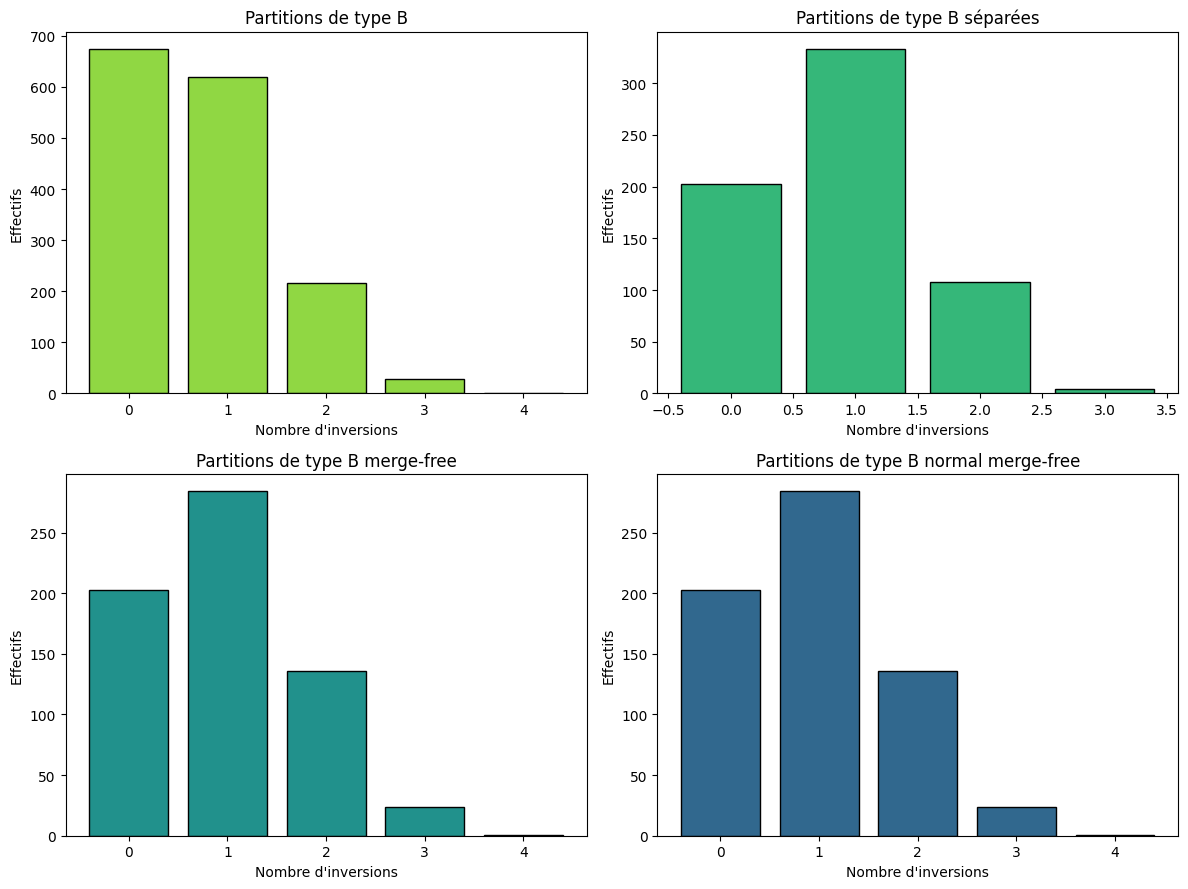

Partitions de type B :
Nombre d'inversions : 0, Effectifs : 674
Nombre d'inversions : 1, Effectifs : 619
Nombre d'inversions : 2, Effectifs : 216
Nombre d'inversions : 3, Effectifs : 29
Nombre d'inversions : 4, Effectifs : 1

Partitions de type B séparées :
Nombre d'inversions : 0, Effectifs : 203
Nombre d'inversions : 1, Effectifs : 333
Nombre d'inversions : 2, Effectifs : 108
Nombre d'inversions : 3, Effectifs : 4

Partitions de type B merge-free :
Nombre d'inversions : 0, Effectifs : 203
Nombre d'inversions : 1, Effectifs : 284
Nombre d'inversions : 2, Effectifs : 136
Nombre d'inversions : 3, Effectifs : 24
Nombre d'inversions : 4, Effectifs : 1

Partitions de type B normal merge-free :
Nombre d'inversions : 0, Effectifs : 203
Nombre d'inversions : 1, Effectifs : 284
Nombre d'inversions : 2, Effectifs : 136
Nombre d'inversions : 3, Effectifs : 24
Nombre d'inversions : 4, Effectifs : 1


In [21]:
def get_bar_data(inv_counts):
    valeurs, effectifs = np.unique(inv_counts, return_counts=True)
    return valeurs, effectifs


# Inversions
vals_B, cnts_B = get_bar_data(parts_B_inv_counts)
vals_B_sep, cnts_B_sep = get_bar_data(parts_B_separated_inv_counts)
vals_B_mf, cnts_B_mf = get_bar_data(parts_B_merge_free_inv_counts)
vals_B_nmf, cnts_B_nmf = get_bar_data(parts_B_normal_merge_free_inv_counts)

# Visualiser
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Diagramme à bâtons pour partitions de type B
axes[0, 0].bar(vals_B, cnts_B, color="#90d743", edgecolor="black")
axes[0, 0].set_xlabel("Nombre d'inversions")
axes[0, 0].set_ylabel("Effectifs")
axes[0, 0].set_title("Partitions de type B")

# Diagramme à bâtons pour partitions de type B séparées
axes[0, 1].bar(vals_B_sep, cnts_B_sep, color="#35b779", edgecolor="black")
axes[0, 1].set_xlabel("Nombre d'inversions")
axes[0, 1].set_ylabel("Effectifs")
axes[0, 1].set_title("Partitions de type B séparées")

# Diagramme à bâtons pour partitions de type B merge-free
axes[1, 0].bar(vals_B_mf, cnts_B_mf, color="#21918c", edgecolor="black")
axes[1, 0].set_xlabel("Nombre d'inversions")
axes[1, 0].set_ylabel("Effectifs")
axes[1, 0].set_title("Partitions de type B merge-free")

# Diagramme à bâtons pour partitions de type B normal merge-free
axes[1, 1].bar(vals_B_nmf, cnts_B_nmf, color="#31688e", edgecolor="black")
axes[1, 1].set_xlabel("Nombre d'inversions")
axes[1, 1].set_ylabel("Effectifs")
axes[1, 1].set_title("Partitions de type B normal merge-free")


plt.tight_layout()
plt.show()

# Afficher les effectifs des diagrammes
print("Partitions de type B :")
for val, cnt in zip(vals_B, cnts_B):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B séparées :")
for val, cnt in zip(vals_B_sep, cnts_B_sep):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B merge-free :")
for val, cnt in zip(vals_B_mf, cnts_B_mf):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B normal merge-free :")
for val, cnt in zip(vals_B_nmf, cnts_B_nmf):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")

### Type B inversion free set partitions

Une inversion est un couple $(s, S_j)$, avec $s$ un entier et $S_j$ un bloc, tels que :
- $s \in S_i$ avec $i<j$
- $s > m_j$ avec $m_j$ le minimum en valeur absolue du bloc $S$ 

In [22]:
def is_inversion_free(part):
    """
    Vérifie si une partition de type B est inversion-free
    """
    n = len(part)
    for i in range(n-1):
        for j in range(len(part[i])):
            if abs(part[i][j]) > part[i+1][0]:  # équivalent à part[i][j] > abs(np.array(part[i+1])).min()
                return False
    return True

# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Partitions de type B  inversion-free.
parts_B_inversion_free = [part for part in parts_B if is_inversion_free(part)]
# Partition de type B inversion-free séparée.
parts_B_inversion_free_separated = [part for part in parts_B_inversion_free if is_separated(part)]
# Partitions de type B inversion-free merge-free.
parts_B_inversion_free_merge_free = [part for part in parts_B_inversion_free if is_merge_free(part)]
# Partitions de type B inversion-free normal merge-free.
parts_B_inversion_free_normal_merge_free = [part for part in parts_B_inversion_free if is_normal_merge_free(part)]


# Afficher les résultats
print_partitions(parts_B_inversion_free, length=n, name="partitions de type B inversion-free", scope=3)
print(f"Nombre de partitions de type B inversion-free séparées pour n={n} : {len(parts_B_inversion_free_separated)}")
print(f"Nombre de partitions de type B inversion-free merge-free pour n={n} : {len(parts_B_inversion_free_merge_free)}")
print(f"Nombre de partitions de type B inversion-free normal merge-free pour n={n} : {len(parts_B_inversion_free_normal_merge_free)}")


[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, -5]]
[[1, 2, 3, -4, 5]]
...
[[1], [2], [3], [4, 5]]
[[1], [2], [3], [4, -5]]
[[1], [2], [3], [4], [5]]
Nombre de partitions de type B inversion-free pour n=5 : 81
Nombre de partitions de type B inversion-free séparées pour n=5 : 16
Nombre de partitions de type B inversion-free merge-free pour n=5 : 16
Nombre de partitions de type B inversion-free normal merge-free pour n=5 : 34


In [23]:
results = []
for n in range(0, 10):
    E = list(range(1, n+1))
    parts_A = partitionne_bell(E)
    parts_B = get_all_parts_B_from_A(parts_A)
    
    parts_B_inversion_free = [part for part in parts_B if is_inversion_free(part)]
    parts_B_inversion_free_separated = [part for part in parts_B_inversion_free if is_separated(part)]
    parts_B_inversion_free_merge_free = [part for part in parts_B_inversion_free if is_merge_free(part)]
    parts_B_inversion_free_normal_merge_free = [part for part in parts_B_inversion_free if is_normal_merge_free(part)]
    
    results.append({
        'n': n,
        'inversion_free': len(parts_B_inversion_free),
        'separated_IF': len(parts_B_inversion_free_separated),
        'merge_free_IF': len(parts_B_inversion_free_merge_free),
        'normal_merge_free_IF': len(parts_B_inversion_free_normal_merge_free)
    })

df = pd.DataFrame(results).set_index('n')
df

,inversion_free,separated_IF,merge_free_IF,normal_merge_free_IF
n,,,,
0,1,1,1,1
1,1,1,1,1
2,3,2,2,2
3,9,4,4,5
4,27,8,8,13
5,81,16,16,34
6,243,32,32,89
7,729,64,64,233
8,2187,128,128,610
